# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [6]:
tabela = df.groupby('sex')['flag_doente'].agg([
    ('Número de doentes', 'sum'),
    ('Número de saudáveis', lambda x: (x == 0).sum()),
    ('Total', 'count'),
    ('Quantidade média de doentes', 'mean')
]).reset_index()

tabela['Odds'] = tabela['Número de doentes'] / tabela['Número de saudáveis']

odds_total = df['flag_doente'].sum() / (df['flag_doente'] == 0).sum()
tabela['Odds Ratio'] = tabela['Odds'] / odds_total

tabela['Logito'] = np.log(tabela['Odds'])

tabela['WOE'] = np.log(tabela['Odds Ratio'])

tabela['Sexo'] = tabela['sex'].map({0: 'Mulher', 1: 'Homem'})
tabela = tabela.drop(columns='sex')

tabela = tabela[['Sexo', 'Número de saudáveis', 'Número de doentes', 'Total',
                 'Quantidade média de doentes', 'Odds', 'Odds Ratio', 'Logito', 'WOE']]
print(tabela)



     Sexo  Número de saudáveis  Número de doentes  Total  \
0  Mulher                   72                 25     97   
1   Homem                   92                114    206   

   Quantidade média de doentes      Odds  Odds Ratio   Logito       WOE  
0                     0.257732  0.347222    0.409672 -1.05779 -0.892398  
1                     0.553398  1.239130    1.461996  0.21441  0.379802  


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [7]:
df['age_group'] = pd.qcut(df['age'], q=5, duplicates='drop')

tabela_age = df.groupby('age_group').agg(
    Número_de_saudáveis = ('flag_doente', lambda x: (x == 0).sum()),
    Número_de_doentes = ('flag_doente', 'sum'),
    Total = ('flag_doente', 'count'),
    Média_de_doentes = ('flag_doente', 'mean'),
    Média_idade = ('age', 'mean')
).reset_index()

tabela_age['Odds'] = tabela_age['Número_de_doentes'] / tabela_age['Número_de_saudáveis']

odds_total = df['flag_doente'].sum() / (df['flag_doente'] == 0).sum()

tabela_age['Odds_Ratio'] = tabela_age['Odds'] / odds_total
tabela_age['Logito'] = np.log(tabela_age['Odds'])
tabela_age['WOE'] = np.log(tabela_age['Odds_Ratio'])

tabela_age = tabela_age.rename(columns={'age_group': 'Faixa etária'})


C:\Users\shinoki\AppData\Local\Temp\ipykernel_7144\214950563.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabela_age = df.groupby('age_group').agg(


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

C:\Users\shinoki\AppData\Local\Temp\ipykernel_7144\2881269382.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tabela_age, x='Faixa etária', y='WOE', palette='Spectral')


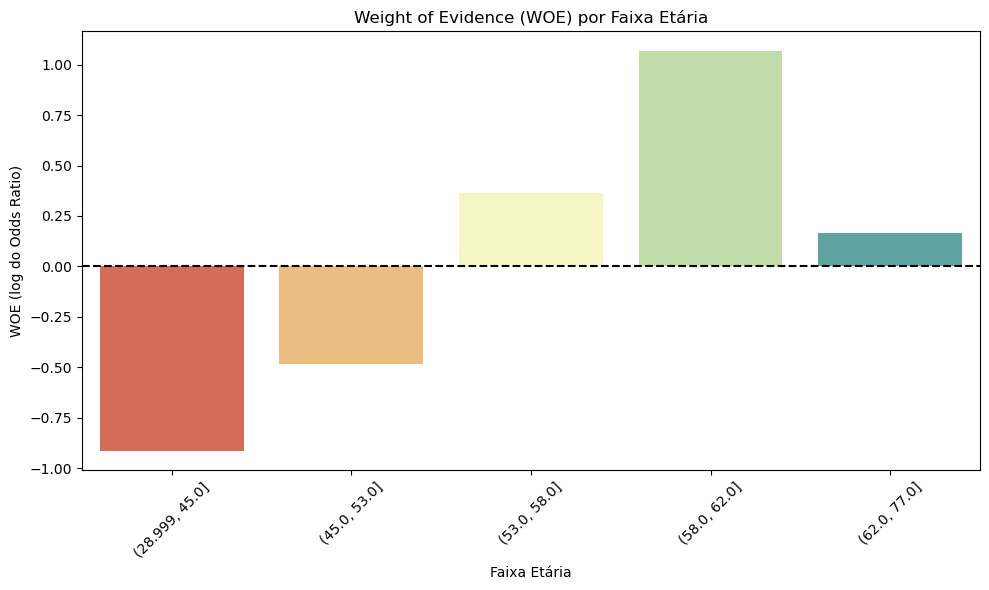

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(data=tabela_age, x='Faixa etária', y='WOE', palette='Spectral')
plt.axhline(0, color='black', linestyle='--')
plt.title('Weight of Evidence (WOE) por Faixa Etária')
plt.ylabel('WOE (log do Odds Ratio)')
plt.xlabel('Faixa Etária')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\shinoki\AppData\Local\Temp\ipykernel_7144\1386024873.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tabela_age, x='Faixa etária', y='Odds', palette='viridis')


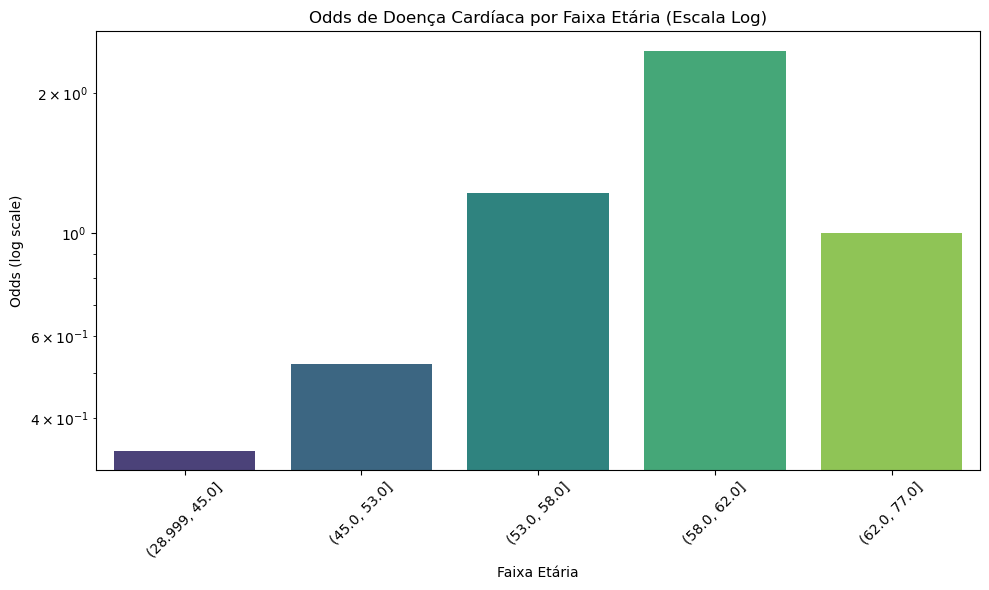

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(data=tabela_age, x='Faixa etária', y='Odds', palette='viridis')
plt.yscale('log')
plt.title('Odds de Doença Cardíaca por Faixa Etária (Escala Log)')
plt.ylabel('Odds (log scale)')
plt.xlabel('Faixa Etária')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
